In [231]:
# Name  - Suraj Chouhan
# Enroll - 0818CS191181

In [232]:
#Import Necessary Packages/Libraries for data preprocessing, model development, and validation:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
%matplotlib inline

In [233]:
#Read the dataset:
data = pd.read_csv('car_evaluation.csv')
#We can check the first five samples of the data:
data.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [234]:
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [235]:
#we can check the dimension of the data- to find the number of observations and number of features
data.shape

(1727, 7)

In [236]:
#We can show the feature/columns names of the dataset
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [238]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,5more,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [239]:
#We must check whether the dataset contains any missing values. 
#If the data contain missing values
#then we should impute the missing values or drop the observations that contain missing values.

data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [240]:
#We can count the number of samples in each class of the dataset
#as well as can plot the distribution for visual representation

data['class'].value_counts()


unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

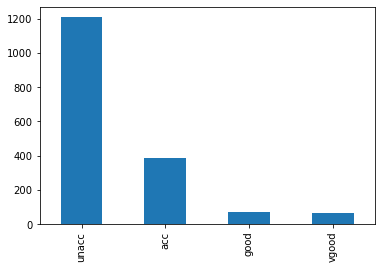

In [241]:
#Plotting the Class variable
data['class'].value_counts().plot(kind = 'bar')
plt.show()

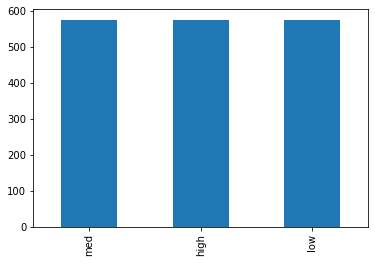

In [242]:
#Distribution of Independent Variables
#We can check the distribution of the independent variable to better understand the data.
#I include one example here, however, you should try with other variables.
data['safety'].value_counts().plot(kind = 'bar')
plt.show()

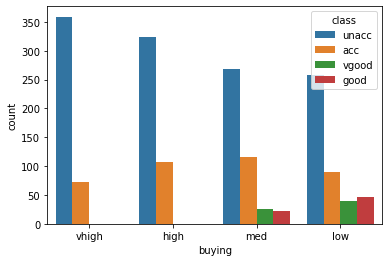

In [243]:
import seaborn as sns
sns.countplot(data['buying'], hue = data['class'])
plt.show()

In [244]:
X = data.drop(['class'], axis = 1)
y = data['class']

In [245]:
from sklearn.preprocessing import OrdinalEncoder
buying_price_category = ['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high', 'vhigh']
doors_category = ['2', '3', '4', '5more']
person_capacity_category = ['2', '4', 'more']
lug_boot_category = ['small', 'med', 'big']
safety_category = ['low', 'med', 'high']
all_categories = [buying_price_category, maint_cost_category,doors_category,person_capacity_category,lug_boot_category,safety_category]
oe = OrdinalEncoder(categories= all_categories)
X = oe.fit_transform( data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']])

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X,data.index.values , test_size = 0.3, random_state=2)

In [247]:
DT_classifier = DecisionTreeClassifier( criterion= 'gini', max_depth= 3, min_samples_split= 10)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [248]:
#We predict on the test data:
y_pred = DT_classifier.predict(X_test)

In [251]:
confusion_matrix(y_test, y_pred)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
print(metrics.classification_report(y_test, y_pred))
 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       0.0
          33       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       1.0
          40       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       1.0
          45       0.00    

In [228]:
DT_classifier.score(X_test,y_test)

0.0

SyntaxError: cannot assign to function call (<ipython-input-253-d76c2c83f467>, line 2)